## Background
You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!

Follow the steps below to analyze the customer data (it's fake, no real credit card numbers or emails).

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [ ]:
# get the latest version of seaborn

In [ ]:
pip install seaborn --upgrade

     |████████████████████████████████| 286kB 3.4MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Get the Data

The data is contained in `EcommerceCustomers.csv` file. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [5]:
# working on colab remotely
customers = pd.read_csv('https://raw.githubusercontent.com/wintonw/ISE364/master/Linear_Reg/EcommerceCustomers.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [8]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

For the rest of the exercise you will only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [ ]:
# this data make sense, more Time on Website will means more Yearly Amount Spent

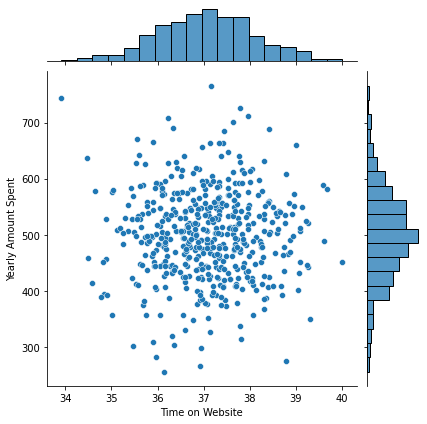

In [11]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

**Do the same but with the Time on App column instead.**

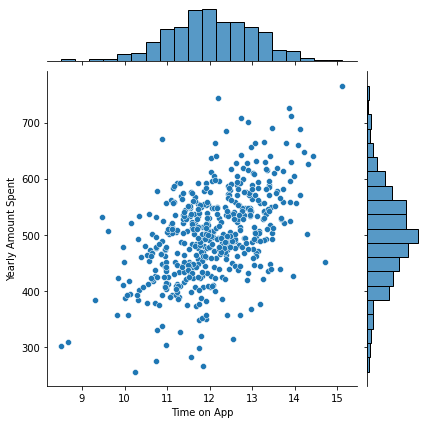

In [12]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

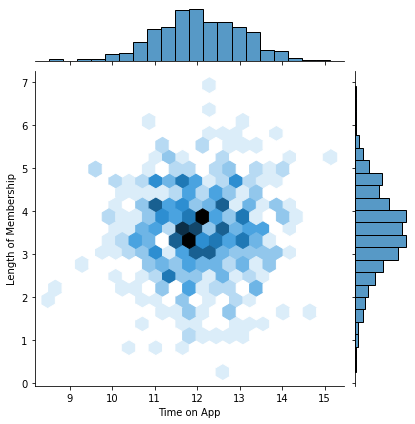

In [13]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind='hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot)**

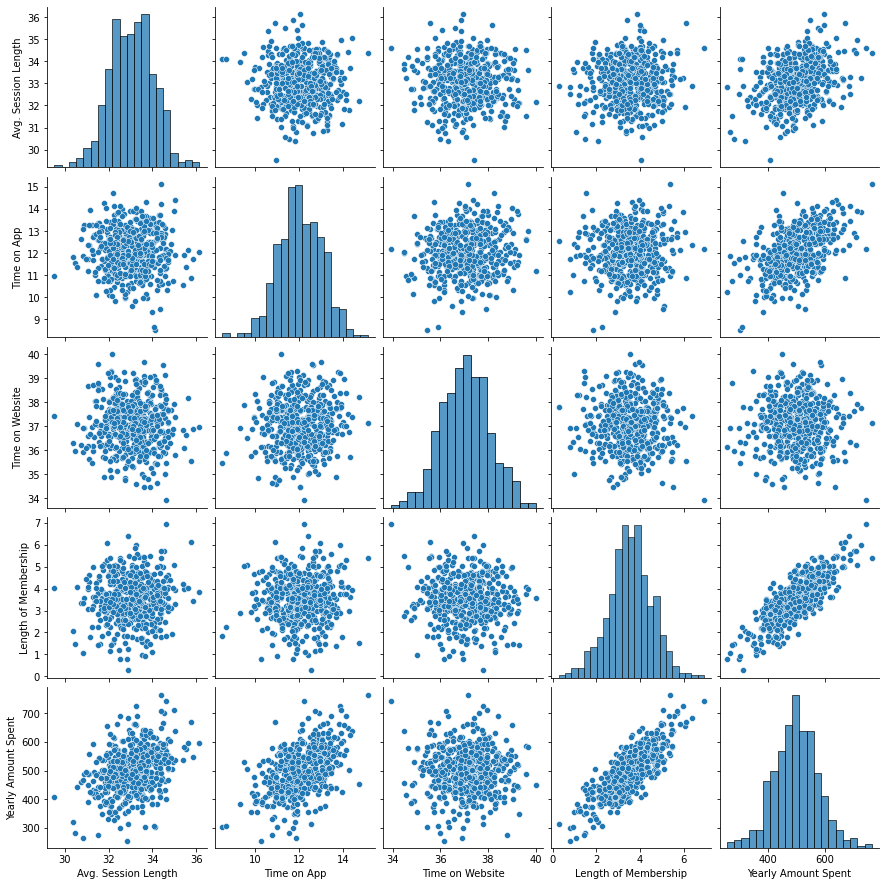

In [14]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [ ]:
# 'Length of Membership'

**Create a linear model plot (using seaborn's lmplot function) of  Yearly Amount Spent vs. Length of Membership.**

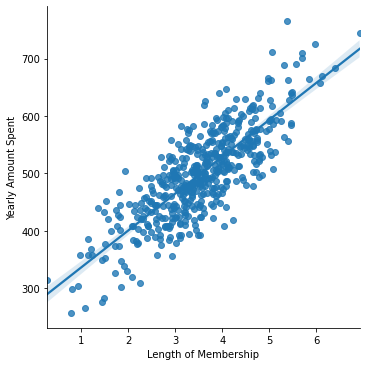

In [15]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

## Training and Testing Data

Now that you have explored the data a bit, split the data into training and testing sets.

**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [21]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [17]:
y = customers['Yearly Amount Spent']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [19]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=101)

## Training the Model

Now its time to train the model using the training data!

**Import LinearRegression from sklearn.linear_model**

In [23]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [36]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [37]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [38]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now evaluate the model performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [39]:
predictions = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

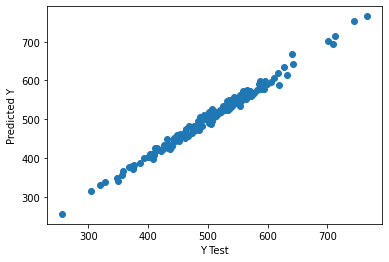

In [40]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [46]:
from sklearn import metrics
print('''MAE: %.14f
MSE: %.14f
RMSE: %.14f'''%(metrics.mean_absolute_error(y_test, predictions), metrics.mean_squared_error(y_test, predictions), np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.22814865343083
MSE: 79.81305165097430
RMSE: 8.93381506697863


## Residuals

You should have gotten a very good model with a good fit. Explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn displot, or just plt.hist().**

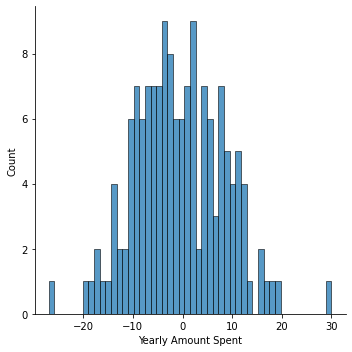

In [49]:
sns.displot((y_test-predictions), bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**Recreate the dataframe below.**

In [50]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Do you think the company should focus more on their mobile app or on their website?**
(There are different ways of thinking about this.  No absolute correct answer. 
Would depend upon input from the "business" side.)

*Answers:*

The company show focus more on their app instead of their website, as the data showed, more Time on App leads to more Yearly Amount Spent, which is what we want. However, this company should really focus on extending the Length of the Membership for each members as that will be the biggest driver to more Yearly Amount Spent